In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
#from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

class PotentialEnergyMethod:
    def __init__(self):
        self.__cats_count = None
        self.__y_train = None
        self.__x_train = None
        self.__h = None
        self.__gammas = None
        self.__train_sz = None
        self.__offset = 0
    
    @staticmethod
    def distance(u, x2):# ro
        return np.linalg.norm(u - x2)
    
    @staticmethod
    def K(r):
        return 1 / (r + 1)
    
    @property
    def gammas(self):
        return self.__gammas
    
    def fit(self, x_train, y_train, h = None):
        self.__y_train = np.copy(y_train)
        self.__x_train = np.copy(x_train)
        self.__cats_count = len(np.unique(self.__y_train))
        self.__train_sz = len(self.__x_train)
        self.__h = np.copy(h) if h is not None else np.full(self.__cats_count, 2)
        #print(self.__h)
        self.__gammas = np.zeros(self.__train_sz)
        #print(self.__gammas)
        stop = 0
        while stop < 2 * self.__train_sz:
            print('.', end='')
            idx = np.random.randint(self.__train_sz)
            a = self.predict(self.__x_train)
            if a[idx] != self.__y_train[idx]:
                self.__gammas[idx] += 1
                
            stop += 1
        return self.__gammas
    
    def print_gammas(self):
        print(self.__gammas)
        print(len(self.__gammas))
    def set_offset(of):
        self.__offset = of
    
    def predict(self, U):
        u_len = len(U)
        answers = []
        for k in range(u_len):
            a = np.zeros(self.__cats_count)
            for i in range(self.__cats_count):
                for j in range(self.__offset, self.__train_sz):
                    tmp = (self.__y_train[j] == i) * self.__gammas[j]
                    a[i] += tmp * self.K(self.distance(U[k], self.__x_train[j]) / self.__h[i])
            answers.append(np.argmax(a))
       
        return answers
            
        

In [70]:

pe_method = PotentialEnergyMethod()


iris = datasets.load_iris()
#print(iris)
X = iris.data
y = iris.target
#print(X)
#print(y)

#y = label_binarize(y, classes=[0, 1])
#n_classes = y.shape[1]
#print(y[:,1])
#y = y[:,1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

print("Training start:")
pe_method.fit(X_train, y_train)
print("Training stop.")

#pe_method.print_gammas()

answers = pe_method.predict(X_test)
all_count = len(answers)
right_count = 0

for i in range(all_count):
    if y_test[i] == answers[i]:
        right_count += 1
        
print('Right answers in : %0.4f percent' % (right_count * 100 / float(all_count)) )
#print(X_train, y_train)
#for i in range(len(X_train)):
#    print(distance(X_train[len(X_train) - i - 1], X_train[i]))
    

Training start:
......................................................................................................................................................Training stop.
Right answers in : 97.3333 percent


In [72]:
'''print("Training start:")
pe_method.fit(X_train, y_train)
print("Training stop.")
'''
print(pe_method.gammas)
pe_method.set_offset(1)

[0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0.]


In [76]:
answers = pe_method.predict(X_test)
all_count = len(answers)
right_count = 0

for i in range(all_count):
    if y_test[i] == answers[i]:
        right_count += 1
        
print('Right answers in : %0.4f percent' % (right_count * 100 / float(all_count)) )
#print(X_train, y_train)
#for i in range(len(X_train)):
#    print(distance(X_train[len(X_train) - i - 1], X_train[i]))
    

Right answers in : 97.3333 percent


In [54]:
print(answers[0], y_train[0])
#print(pe_method.__gammas)

1 1


[1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0]
[[6.4 2.8 5.6 2.1]
 [6.4 3.2 5.3 2.3]
 [6.  3.4 4.5 1.6]
 [6.  2.2 5.  1.5]
 [5.7 2.5 5.  2. ]
 [6.5 3.2 5.1 2. ]
 [6.1 2.8 4.7 1.2]
 [5.1 3.3 1.7 0.5]
 [6.2 2.8 4.8 1.8]
 [6.3 2.8 5.1 1.5]
 [5.8 2.6 4.  1.2]
 [6.  2.7 5.1 1.6]
 [5.4 3.4 1.5 0.4]
 [7.  3.2 4.7 1.4]
 [7.4 2.8 6.1 1.9]
 [4.6 3.6 1.  0.2]
 [5.4 3.  4.5 1.5]
 [5.8 4.  1.2 0.2]
 [6.5 3.  5.2 2. ]
 [6.5 2.8 4.6 1.5]
 [6.7 3.  5.  1.7]
 [4.6 3.2 1.4 0.2]]


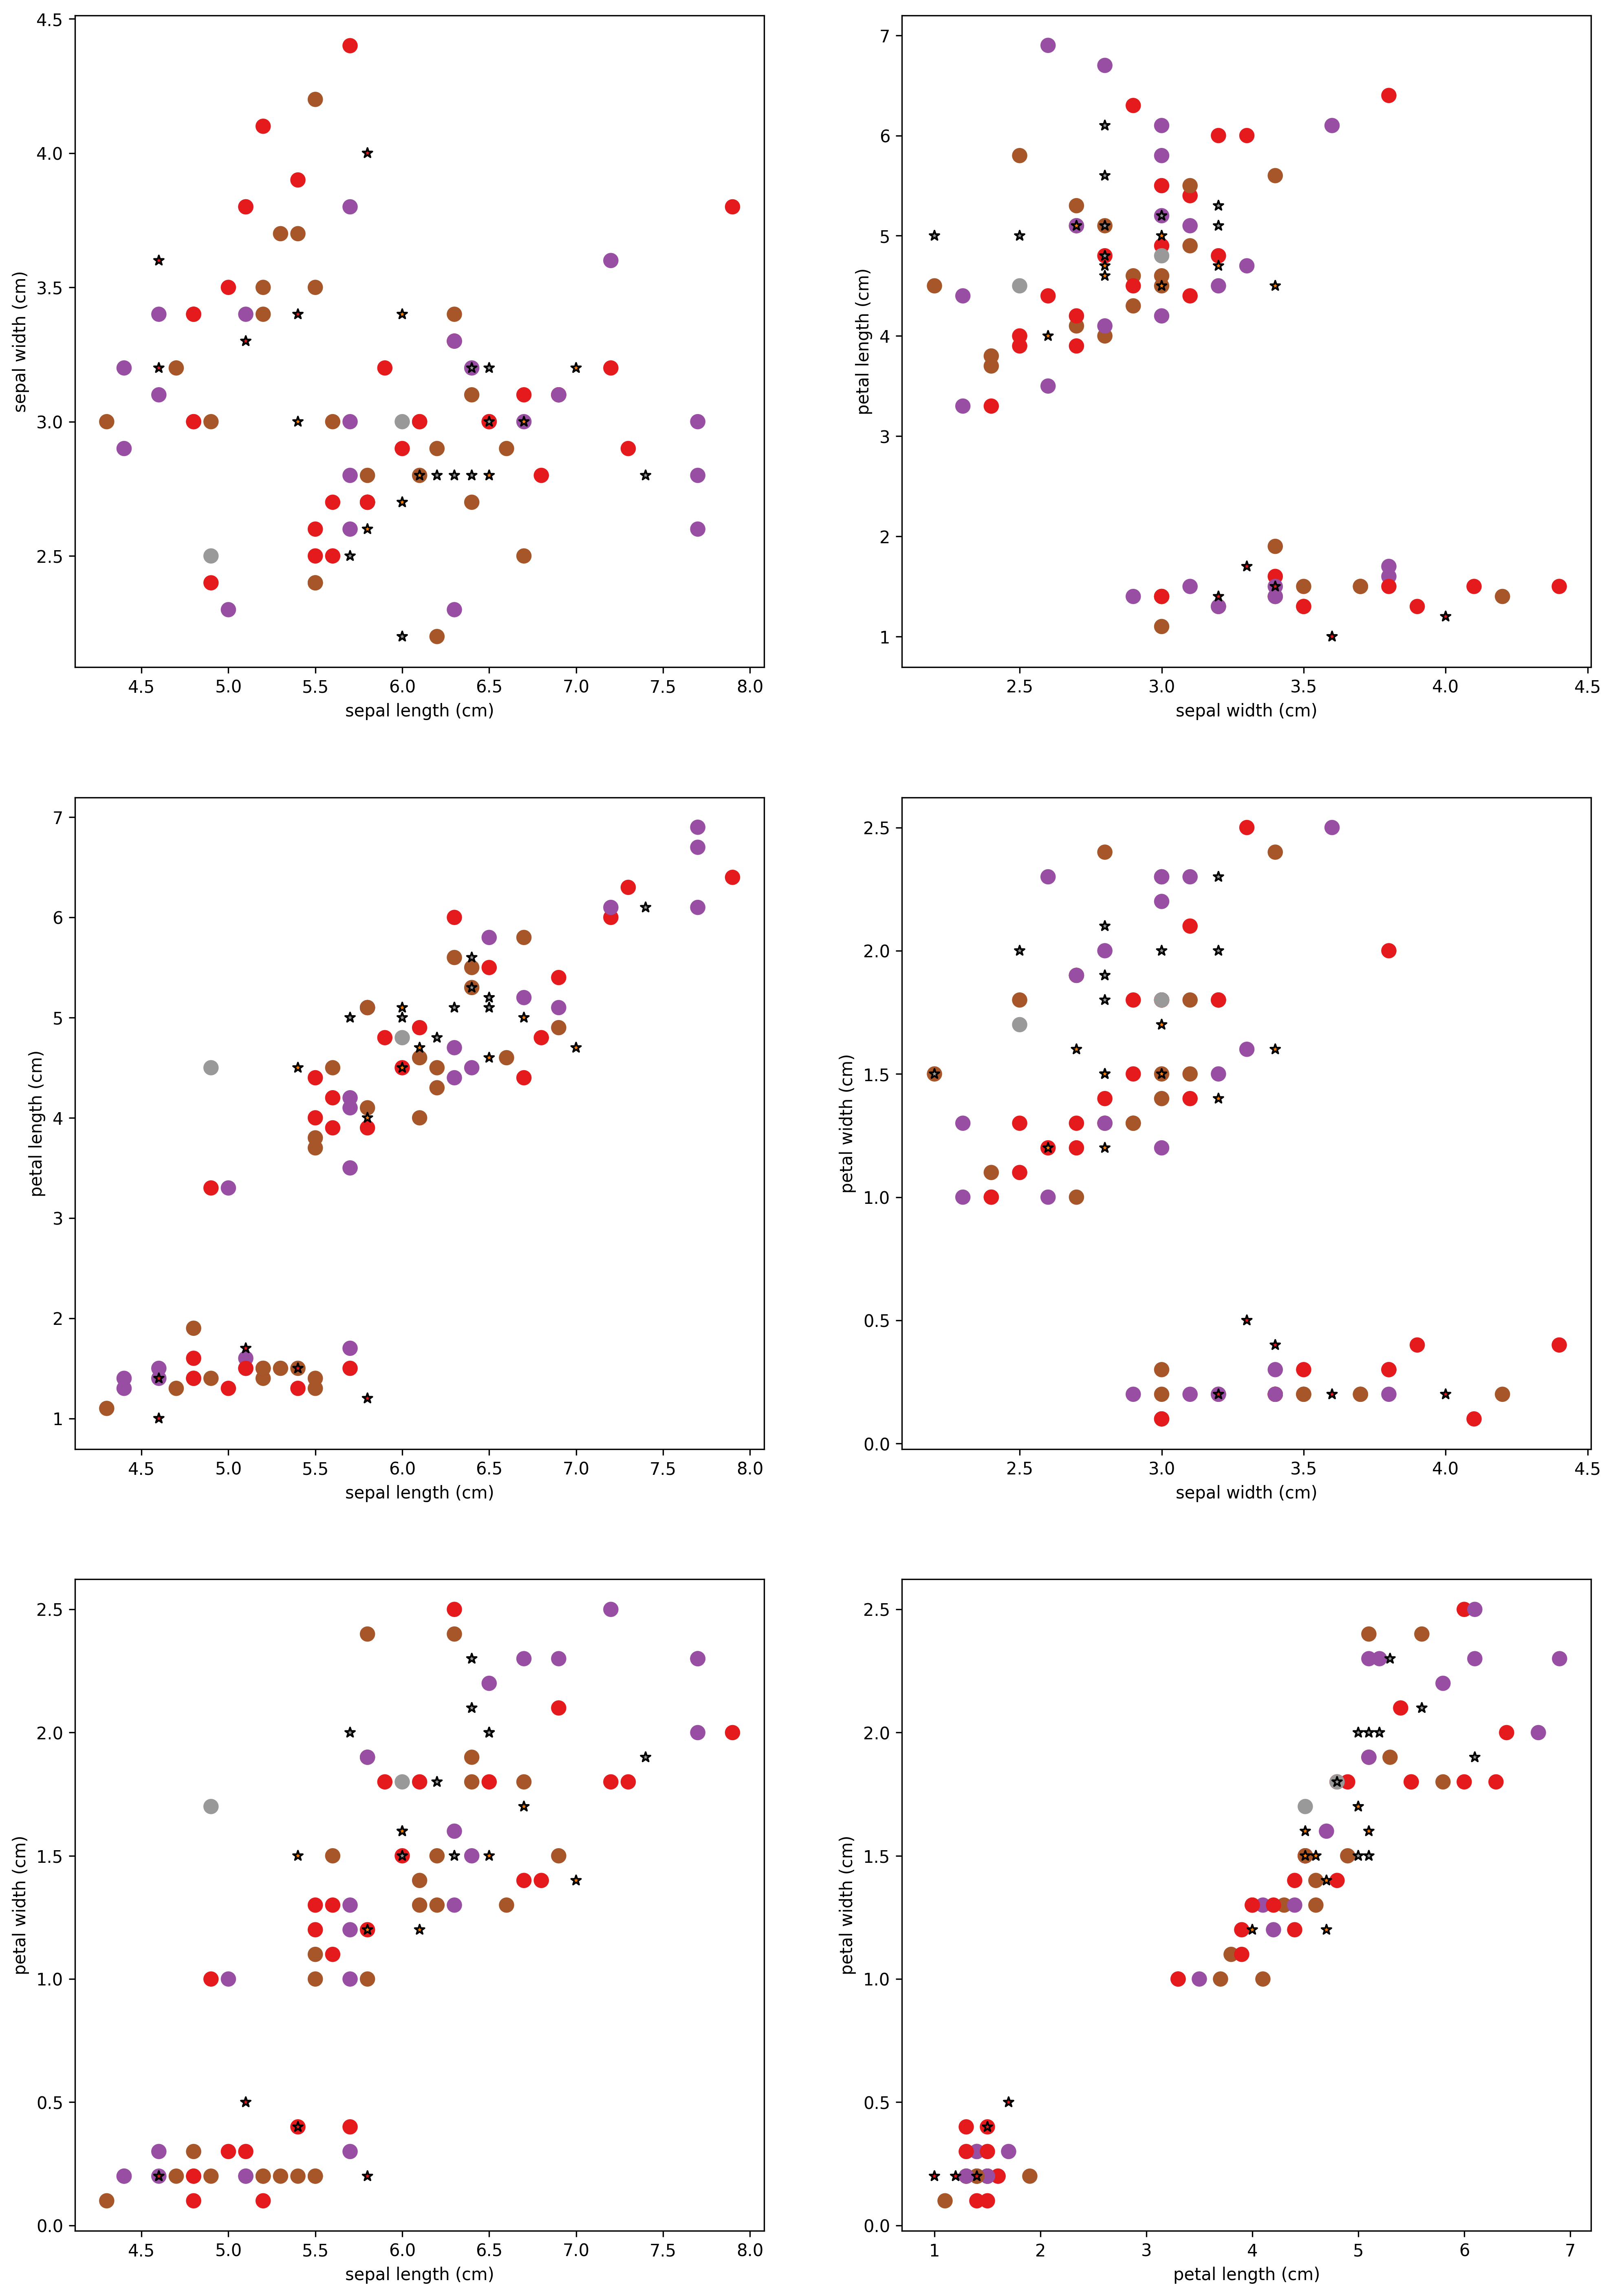

In [98]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1
print(answers)
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plots = np.zeros(all_count)
xu = []
cu = []
for i in range(all_count):
    plots[i] = y_train[i] 
        
        
    if y_test[i] != answers[i]:
        plots[i] = 3
    if pe_method.gammas[i] > 0:
        xu.append(X_train[i])
        cu.append(y_train[i])
'''
plt.figure(figsize=(5, 4))
plt.scatter(X_train[:, x_index], X_train[:, y_index], c=plots)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
'''
xu = np.array(xu)
cu = np.array(cu)
print(xu)
import itertools

fig, axarr = plt.subplots(3, 2, figsize=(16, 24), dpi=300)

combs = list(itertools.combinations([0, 1, 2, 3], 2))
for i, (x, y) in enumerate(itertools.product(range(2), range(3))):
        axarr[y, x].scatter(X_test[:, combs[i][0]], X_test[:, combs[i][1]], c=plots, cmap=plt.cm.Set1, linewidth=3)
        # Plot useful elements marked with 'o'
        axarr[y, x].scatter(xu[:, combs[i][0]], xu[:, combs[i][1]], c=cu, cmap=plt.cm.Set1, edgecolor='k', marker='*', linewidth=1)
        axarr[y, x].set_xlabel(iris.feature_names[combs[i][0]])
        axarr[y, x].set_ylabel(iris.feature_names[combs[i][1]])

plt.show()

In [23]:
X_train.shape

(75, 4)